# Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/car_insurance.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/car_insurance.parquet')

In [5]:
y_train = train.OUTCOME
X_train = train.drop(columns=['OUTCOME'])

In [6]:
y_validation = validation.OUTCOME
X_validation = validation.drop(columns=['OUTCOME'])

In [7]:
exploratory_depths = [1, 10, 20, 30, 50]
exploratory_estimators = [5, 10, 20, 30, 50, 100, 200, 500, 1000]

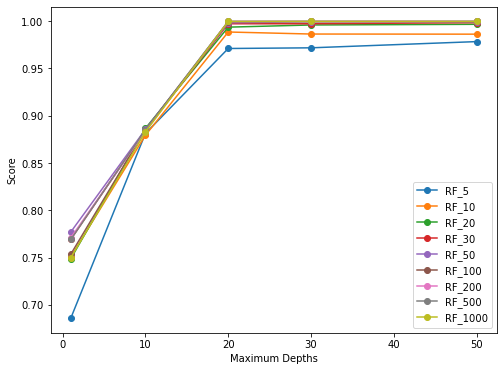

In [8]:
plt.figure(figsize=(8, 6))

for n in exploratory_estimators:
    plt.plot(exploratory_depths, [RandomForestClassifier(n_estimators=n, max_depth=i).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='RF_'+str(n))
    
plt.xlabel('Maximum Depths')
plt.ylabel('Score')
plt.legend()
plt.show()

In [13]:
max_depth = [1, 3, 5, 7, 10, 12, 15, 20, 25]
n_estimators = [1, 5, 10, 15, 20, 25, 30, 35]

In [14]:
models_list = []
names_list = []
for n in n_estimators:
    for i in max_depth:
        models_list.append(RandomForestClassifier(n_estimators=n, max_depth=i))
        names_list.append('RF_'+str(n)+'_'+str(i))

In [15]:
metrics = classification(models_list, names_list, '../../../data/metrics/car_insurance/random_forest.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
RF_1_1,0.030916,0.638168,0.645588,1.162734
RF_1_3,0.023935,0.788873,0.778880,-1.266764
RF_1_5,0.019946,0.857281,0.860460,0.370770
RF_1_7,0.027926,0.870388,0.844889,-2.929640
RF_1_10,0.028195,0.905221,0.841153,-7.077651
...,...,...,...,...
RF_35_10,0.251716,0.959487,0.907133,-5.456371
RF_35_12,0.285672,0.980732,0.904066,-7.817312
RF_35_15,0.340061,0.997067,0.901011,-9.633884
RF_35_20,0.362066,0.999958,0.902568,-9.739377


In [16]:
metrics.sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
RF_35_10,0.251716,0.959487,0.907133,-5.456371
RF_30_12,0.267855,0.980082,0.906106,-7.547926
RF_30_10,0.266288,0.957100,0.905809,-5.359010
RF_20_10,0.199465,0.957730,0.904613,-5.546146
RF_35_12,0.285672,0.980732,0.904066,-7.817312
...,...,...,...,...
RF_1_3,0.023935,0.788873,0.778880,-1.266764
RF_1_15,0.024934,0.910006,0.752822,-17.272912
RF_1_20,0.029951,0.905912,0.729805,-19.439711
RF_1_25,0.027894,0.907299,0.711877,-21.538905


Let's test our best model: **RF_35_10**, that is, a Random Forest made up of 35 trees of maximum depth 10. It achieves the highest AUC in validation with an acceptable delta.

In [17]:
test = pd.read_parquet('../../../data/model_input/test_sets/car_insurance.parquet')

In [18]:
y_test = test.OUTCOME
X_test = test.drop(columns=['OUTCOME'])

In [19]:
retrain = pd.concat([train, validation])

In [20]:
y_retrain = retrain.OUTCOME
X_retrain = retrain.drop(columns=['OUTCOME'])

In [21]:
model =RandomForestClassifier(n_estimators=35, max_depth=10).fit(X_retrain, y_retrain)

In [22]:
test_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.9174


Actually, the model works pretty well in the test

In [23]:
dump(model, 'best_random_forest.joblib')

['best_random_forest.joblib']

In [24]:
with open('../../../data/metrics/car_insurance/final_AUC.txt', 'a') as f:
    f.write('\nRF, '+ str(auc))